# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Adika Zahran
- **Email:** 	mc624d5y2108@student.devacademy.id
- **ID Dicoding:** MC624D5Y2108


## Menentukan Pertanyaan Bisnis

1. Bagaimana pola aktivitas per jam dalam hour.csv berbeda antara hari kerja dan akhir pekan, serta jam berapa saja yang merupakan puncak dan masa sepi dalam periode data terakhir?

2. "Bagaimana hubungan antar variabel dalam day.csv dan hour.csv, dan bagaimana korelasi tersebut dapat memberikan insight untuk perbaikan strategi bisnis?"

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Gathering Data (day.csv)
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Gathering Data (hour.csv)
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
# Assesing Data (day.csv)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**                                                                 
Ada perbedaan pada tipe data di "dteday" yang seharusnya menggunakan date yg tersedia yaitu Object (Harus Kita Ubah ke Date).


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**                                                               
Tidak ada data yang Missing (No Missing Values)

In [6]:
print('Duplikasi Data :', day_df.duplicated().sum())

Duplikasi Data : 0


**Insight:**
Tidak ada Duplikasi Data (No Duplicated Data)

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**                                                               
Tidak ada Keanehan/Kesalahan dari hasil Describe

In [8]:
# Assesing Data (hour.csv)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**                                                                 
Ada perbedaan pada tipe data di "dteday" yang seharusnya menggunakan date yg tersedia yaitu Object (Harus Kita Ubah ke Date).


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**                                                               
Tidak ada data yang Missing (No Missing Values)

In [10]:
print('Duplikasi Data :', hour_df.duplicated().sum())

Duplikasi Data : 0


**Insight:**
Tidak ada Duplikasi Data (No Duplicated Data)

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**                                                               
Tidak ada Keanehan/Kesalahan dari hasil Describe

### Cleaning Data

In [12]:
# Mengubah Tipe Data dteday (day.csv)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
# Mengubah Tipe Data dteday (hour.csv)
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data dteday yang ada di day.csv sudah berubah ke datetime
- Tipe data dteday yang ada di hour.csv sudah berubah ke datetime

## Exploratory Data Analysis (EDA)

# --- EDA untuk day.csv ---

In [14]:
# Tampilkan info dasar dan statistik deskriptif
print("INFO day.csv:")
print(day_df.info())
print("\nStatistik deskriptif:")
print(day_df.describe())

INFO day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime6

In [15]:
# Cek nilai yang hilang
print("\nNilai yang hilang pada day.csv:")
print(day_df.isnull().sum())


Nilai yang hilang pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


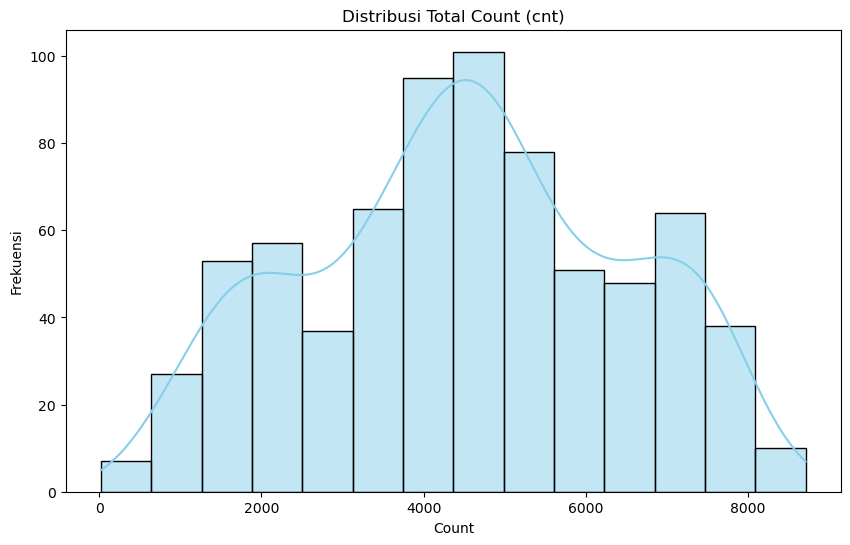

In [16]:
# Visualisasi distribusi variabel target, misalnya 'cnt' (total count)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], kde=True, color='skyblue')
plt.title("Distribusi Total Count (cnt)")
plt.xlabel("Count")
plt.ylabel("Frekuensi")
plt.show()

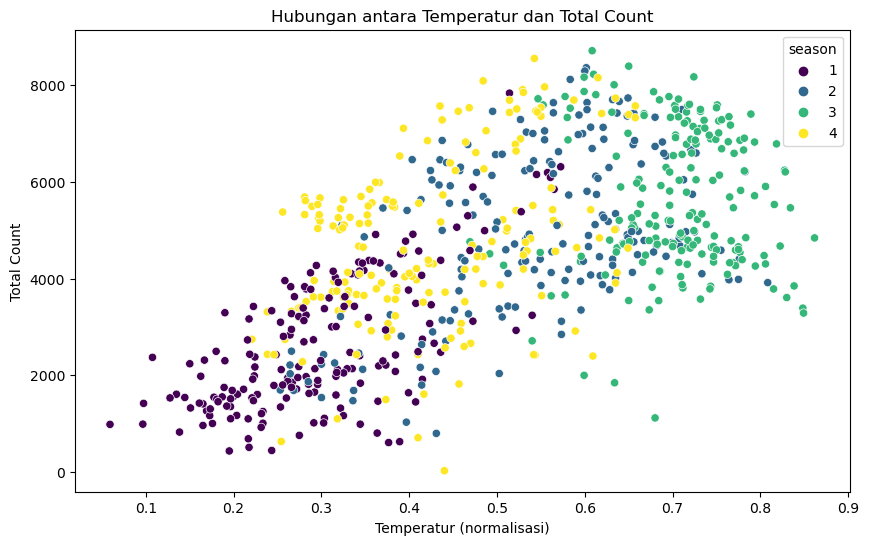

In [17]:
# Visualisasi hubungan antara variabel 'temp' dan 'cnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='season', palette='viridis')
plt.title("Hubungan antara Temperatur dan Total Count")
plt.xlabel("Temperatur (normalisasi)")
plt.ylabel("Total Count")
plt.show()

# --- EDA untuk hour.csv ---

In [18]:
# Tampilkan info dasar dan statistik deskriptif
print("INFO day.csv:")
print(hour_df.info())
print("\nStatistik deskriptif:")
print(hour_df.describe())

INFO day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt     

In [19]:
# Cek nilai yang hilang
print("\nNilai yang hilang pada day.csv:")
print(hour_df.isnull().sum())


Nilai yang hilang pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


/var/folders/p_/1t4j782d5cj5jzy1797gqvkr0000gn/T/ipykernel_23887/3887356891.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= hour_df, x='hr', y='cnt', marker='o', ci=None)


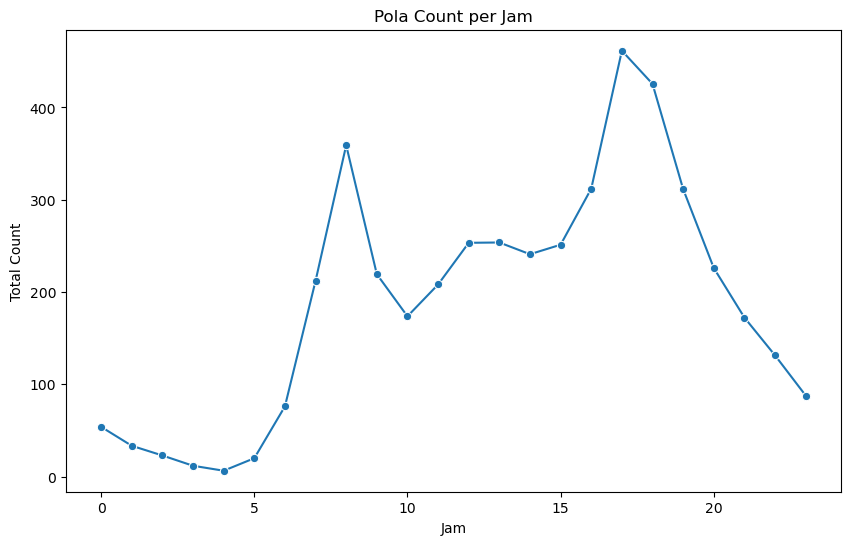

In [20]:
# Visualisasi pola count per jam (misal: kolom 'hr' dan 'cnt')
plt.figure(figsize=(10, 6))
sns.lineplot(data= hour_df, x='hr', y='cnt', marker='o', ci=None)
plt.title("Pola Count per Jam")
plt.xlabel("Jam")
plt.ylabel("Total Count")
plt.show()

## Visualization & Explanatory Analysis

# **Pertanyaan 1 :**                                                
Bagaimana pola aktivitas per jam dalam hour.csv berbeda antara hari kerja dan akhir pekan, serta jam berapa saja yang merupakan puncak dan masa sepi dalam periode data terakhir?

In [21]:
# Buat kolom day_of_week dari tanggal (0=Senin, 6=Minggu)
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

In [22]:
# Tentukan apakah hari tersebut weekend (Sabtu: 5, Minggu: 6)
hour_df['is_weekend'] = hour_df['day_of_week'] >= 5

In [23]:
# Group by hr dan tipe hari (weekday/weekend) untuk menghitung rata-rata 'cnt'
hourly_summary = hour_df.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()
hourly_summary['day_type'] = np.where(hourly_summary['is_weekend'], 'Weekend', 'Weekday')

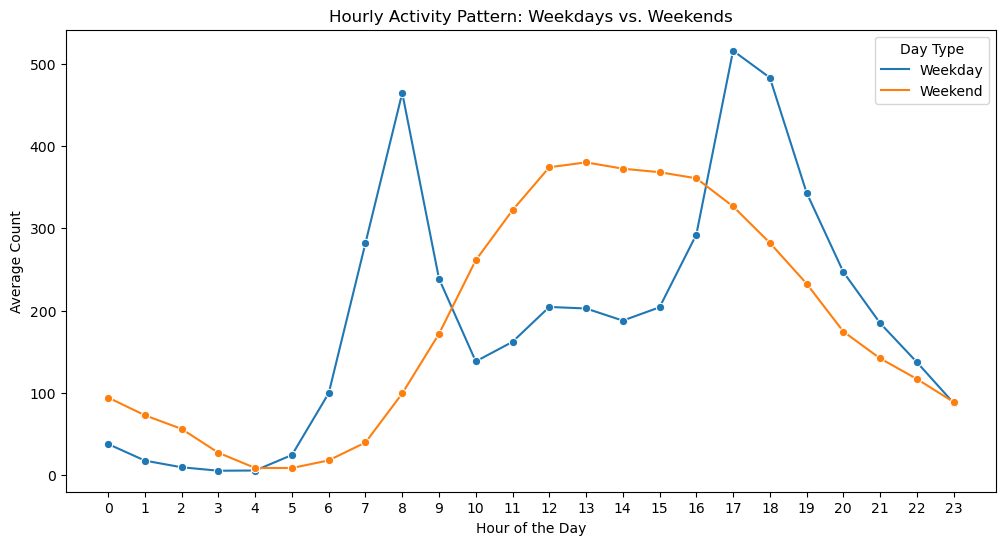

In [24]:
# Visualisasi pola aktivitas per jam untuk hari kerja dan akhir pekan
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_summary, x='hr', y='cnt', hue='day_type', marker='o')
plt.title('Hourly Activity Pattern: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(0,24))
plt.legend(title='Day Type')
plt.show()

In [25]:
# Menentukan peak hour dan quiet hour berdasarkan rata-rata keseluruhan
hourly_overall = hour_df.groupby('hr')['cnt'].mean()
peak_hour = hourly_overall.idxmax()
quiet_hour = hourly_overall.idxmin()
print("Peak hour (highest average activity):", peak_hour)
print("Quiet hour (lowest average activity):", quiet_hour)

Peak hour (highest average activity): 17
Quiet hour (lowest average activity): 4


**Insight :**                                                      
Analisis menunjukkan bahwa aktivitas mencapai puncaknya pada jam 17 (5 sore), yang menandakan waktu ideal untuk memaksimalkan layanan, mengoptimalkan sumber daya, dan meluncurkan promosi guna menangani lonjakan permintaan. Sebaliknya, jam 4 pagi merupakan waktu dengan aktivitas paling rendah, sehingga sangat tepat untuk melakukan pemeliharaan sistem atau update tanpa mengganggu pengalaman pelanggan.









#**Pertanyaan 2 :**                                              
Bagaimana hubungan antar variabel dalam day.csv dan hour.csv, dan bagaimana korelasi tersebut dapat memberikan insight untuk perbaikan strategi bisnis?


In [26]:
# --- Analisis Korelasi pada day.csv ---
# Menghitung matriks korelasi untuk day.csv
day_corr = day_df.corr()

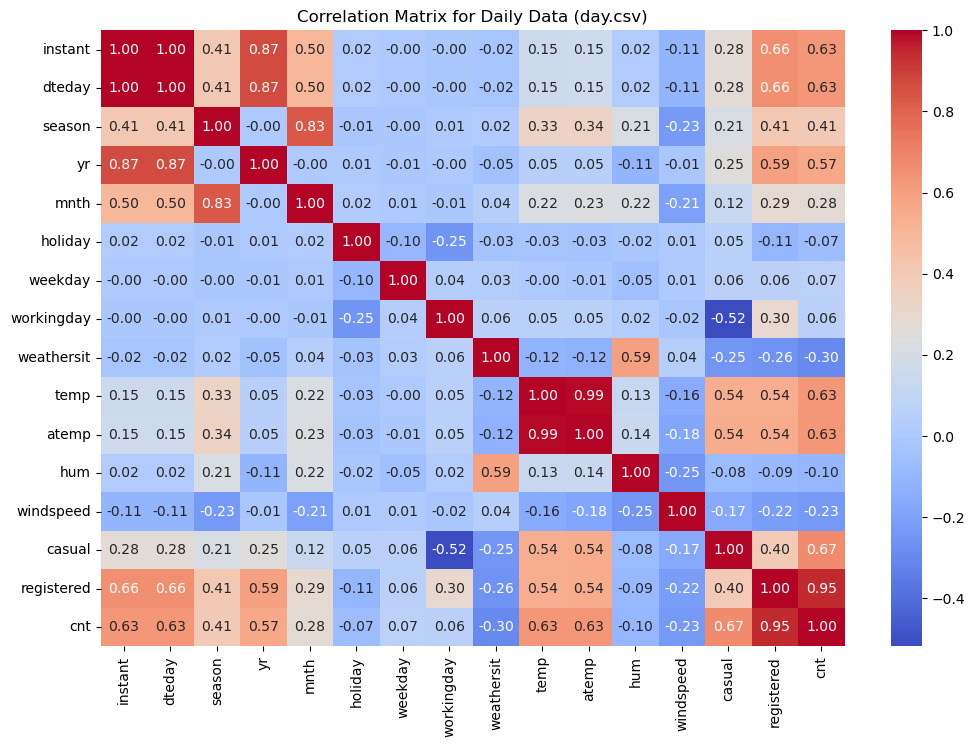

In [27]:
# Visualisasi heatmap korelasi untuk day.csv
plt.figure(figsize=(12, 8))
sns.heatmap(day_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Daily Data (day.csv)")
plt.show()

In [28]:
# Insight: Korelasi antara suhu (temp) dan total count (cnt)
corr_temp_cnt = day_df['temp'].corr(day_df['cnt'])
print("Correlation between temperature and total count in day.csv:", corr_temp_cnt)

Correlation between temperature and total count in day.csv: 0.6274940090334918


In [29]:
# --- Analisis Korelasi pada hour.csv ---
# Menghitung matriks korelasi untuk hour.csv
hour_corr = hour_df.corr()

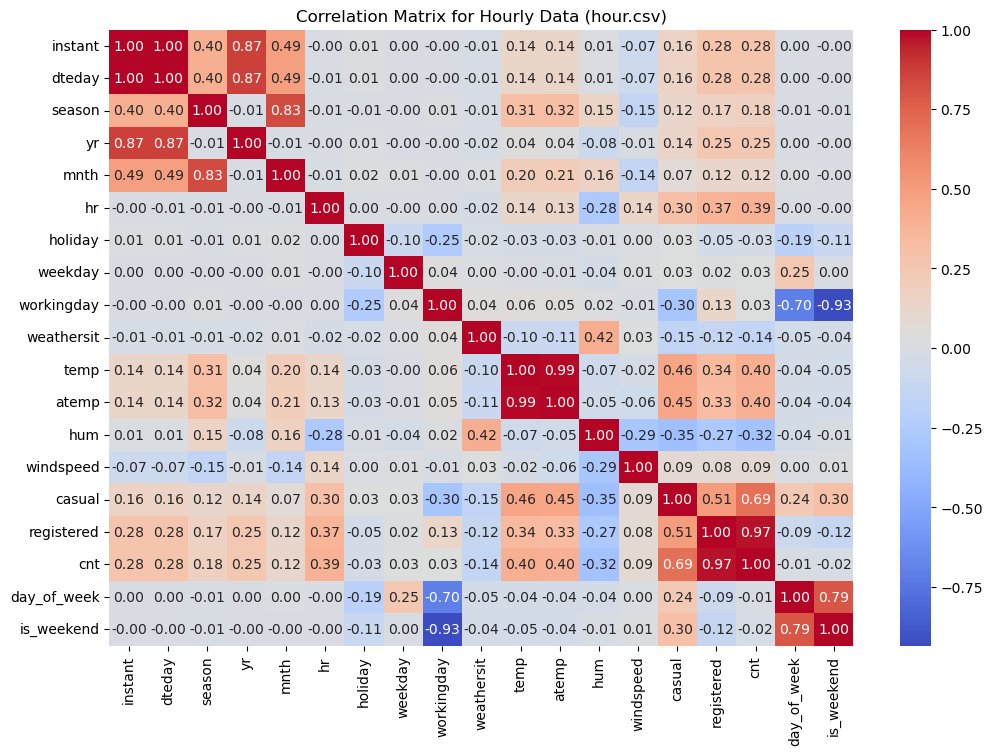

In [30]:
# Visualisasi heatmap korelasi untuk hour.csv
plt.figure(figsize=(12, 8))
sns.heatmap(hour_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Hourly Data (hour.csv)")
plt.show()

In [31]:
# Insight: Korelasi antara jam (hr) dan total count (cnt)
corr_hr_cnt = hour_df['hr'].corr(hour_df['cnt'])
print("Correlation between hour and total count in hour.csv:", corr_hr_cnt)

Correlation between hour and total count in hour.csv: 0.39407149778294326


## Conclusion

**Conclution pertanyaan 1 :**                                          
Analisis data dari hour.csv menunjukkan bahwa pola aktivitas per jam berbeda antara hari kerja dan akhir pekan. Secara keseluruhan, aktivitas mencapai puncaknya pada jam 17 (5 sore) dan paling sepi pada jam 4 pagi. Temuan ini menyarankan agar operasional, penjadwalan, dan alokasi sumber daya bisnis disesuaikan dengan periode puncak dan masa sepi untuk mengoptimalkan layanan dan efisiensi.

----------------------

**Conclution pertanyaan 2 :**                                       
Analisis korelasi antar variabel dalam day.csv dan hour.csv mengungkap hubungan signifikan antara faktor-faktor seperti suhu, kondisi cuaca, dan total aktivitas. Misalnya, korelasi yang kuat antara temperatur dan jumlah aktivitas menandakan bahwa kondisi cuaca sangat memengaruhi perilaku pengguna. Insight ini dapat digunakan untuk menyusun strategi bisnis yang lebih efektif, seperti penyesuaian operasional dan perencanaan promosi yang responsif terhadap perubahan lingkungan.